# scipy.stats 주요 모듈
- 01 T-test
    - ttest_1samp         (단일표본 t검정)
    - ttest_ind           (독립표본 t검정)
    - ttest_rel           (대응표본 t검정) 

- 02 비모수 검정
    - mannwhitneyu        (맨-휘트니 U 검정 - 중위수 , 윌콕슨 순위합 검정과 동일하다 볼 수 있음)
    - ranksums            (윌콕슨 순위합 검정 - 중위수)
    - wilcoxon            (윌콕슨 부호 순위합 검정)
 
- 03 정규정 검정
    - anderson            (Anderson-Darling , 데이터수가 상대적으로 많을 때)
    - kstest              (Kolmogorov-Smirnov , 데이터수가 상대적으로 많을 때)
    - mstats.normaltest
    - shapiro             (shapiro, 노말분포 가장 엄격하게 검정, 데이터수가 상대적으로 적을때)
   
- 04 등분산 검정
    - bartlett
    - fligner
    - levene

- 05 카이제곱검정
    - chi2_contingency     (카이제곱독립검정, 독립성 검정)
    - chisquare            (카이제곱검정 , 적합도 검정)
    - fisher_exact         (피셔 정확 검정 - 빈도수가 5개 이하 셀의 수가 전체 셀의 20%이상일 경우 사용 )

- 06 ANOVA (일원분산분석)
    - f_oneway (분산 분석은  statmodels 모듈이 더 좋음! )


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## 정규성 검정

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
df.head()

,data
0,295.979767
1,289.703739
2,300.609670
3,299.890856
4,293.159612


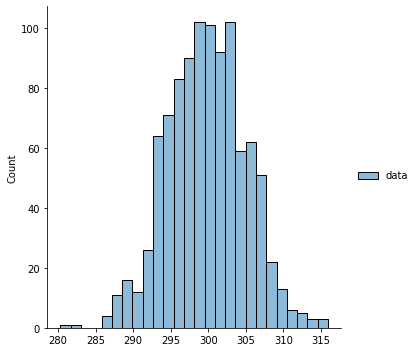

In [3]:
sns.displot(df, kind='hist');

ShapiroResult(statistic=0.9981446862220764, pvalue=0.3485966622829437)


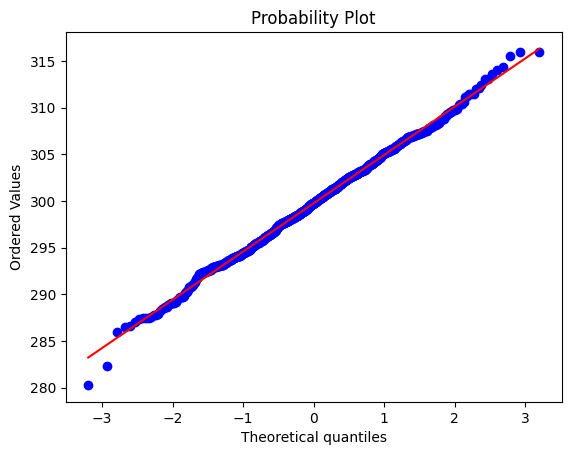

In [4]:
# 정규성 검증
from scipy.stats import shapiro

print(shapiro(df))
stats.probplot(df['data'], dist=stats.norm, plot=plt);

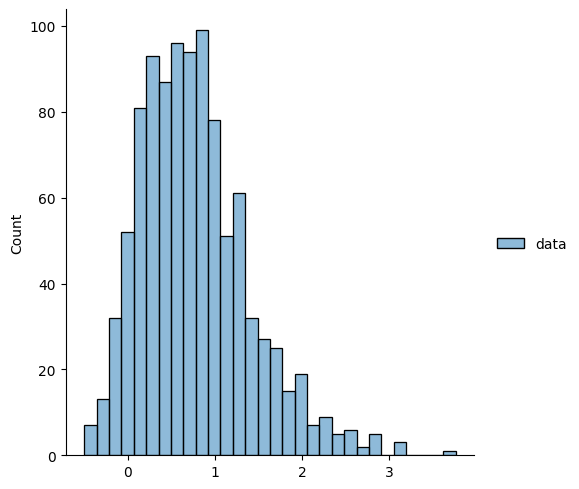

In [5]:
# 데이터 log 변환 후 정규성 검증
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
sns.displot(df, kind='hist', bins=30);

ShapiroResult(statistic=0.9578887224197388, pvalue=2.309859641255865e-16)


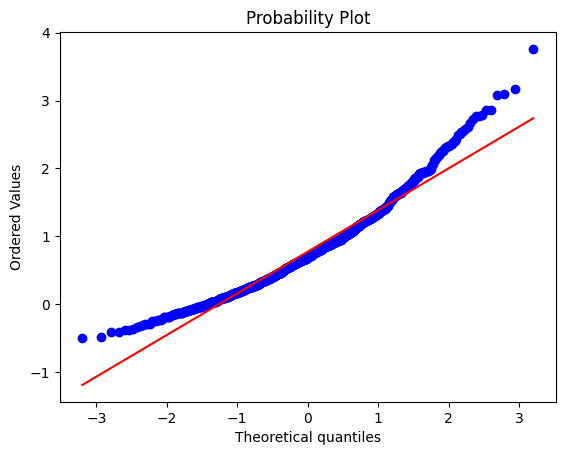

In [6]:
# 정규성 검증
from scipy.stats import shapiro

print(shapiro(df))
stats.probplot(df['data'], dist=stats.norm, plot=plt);

ShapiroResult(statistic=0.9976893067359924, pvalue=0.17551212012767792)


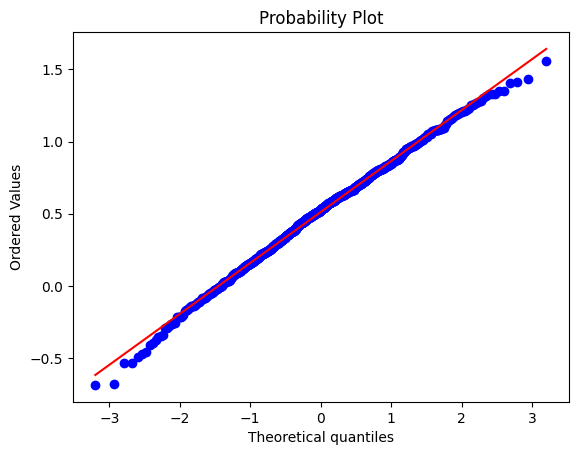

In [7]:
# 정규성 검증
from scipy.stats import shapiro

print(shapiro(np.log1p(df)))
stats.probplot(np.log1p(df['data']), dist=stats.norm, plot=plt);

## 단일 표본 t검정 (one-sample)
- 정규성 만족 시, 단일표본검정 확인
- 정규성 불만족 시, 비모수검정 => 윌콕슨 부호 검정

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

stats.shapiro(df)

ShapiroResult(statistic=0.9872670769691467, pvalue=0.455832302570343)

In [9]:
# 정규성 만족
stats.ttest_1samp(df['height'], 165)

Ttest_1sampResult(statistic=3.2017884987150644, pvalue=0.0018367171548080209)

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

stats.shapiro(df)

ShapiroResult(statistic=0.9672006368637085, pvalue=0.013552471995353699)

In [11]:
# 정규성 불만족
stats.wilcoxon(df['height']-165)

WilcoxonResult(statistic=1952.0, pvalue=0.04880534424649582)

## 등분산 검정

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [13]:
a = df.loc[df['class']=='A']['score']
b = df.loc[df['class']=='B']['score']

print(stats.levene(a,b, center='mean'))
print(stats.levene(a,b, center='median'))
# 유의수준 0.05 수준에서 등분산 이라는 귀무가설 기각 불가능

LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)


In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78


In [15]:
a = df.loc[df['class']=='A']['score']
b = df.loc[df['class']=='B']['score']

print(stats.levene(a,b, center='mean'))
print(stats.levene(a,b, center='median'))
# 유의수준 0.05 수준에서, 등분산 이라는 귀무가설 기각 가능

LeveneResult(statistic=4.342327020297874, pvalue=0.0377066528874248)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)


In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [17]:
a = df['A']
b = df['B']

print(stats.levene(a,b, center='mean'))
print(stats.levene(a,b, center='median'))
# 유의수준 0.05 수준에서, 등분산 이라는 귀무가설 기각 가능

LeveneResult(statistic=5.783103950473267, pvalue=0.016687980542371833)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [19]:
b.isnull().sum()

0

In [20]:
a = df['A']
b = df['B'].dropna()

print(stats.levene(a,b, center='mean'))
print(stats.levene(a,b, center='median'))
# 유의수준 0.05 수준에서, 등분산 이라는 귀무가설 기각 가능

LeveneResult(statistic=8.217541809462276, pvalue=0.004331841625789694)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)


## 독립표본 검정
- 정규성 검정은 shapiro, anderson(샘플 5000개 이상)을 통해 확인
- 정규성 가질 경우 :모수적 검정
    - 두 집단 등분산 : equal_var=True
    - 두 집단 등분산 아님 : equal_var=False, welch t-test
- 정규성 없으면 : 비모수적 검정

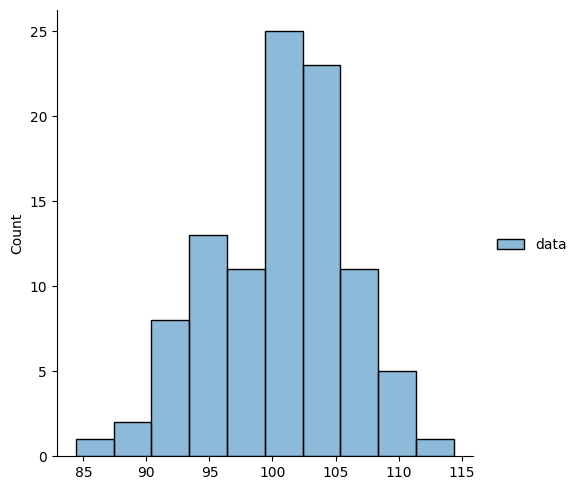

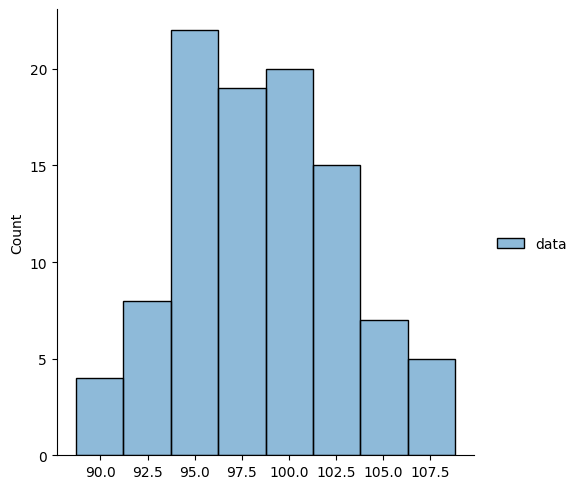

In [21]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')

sns.displot(df1, kind='hist');
sns.displot(df2, kind='hist');
plt.show();

In [23]:
print(stats.shapiro(df1))
print(stats.shapiro(df2))

# 둘 다 정규성

ShapiroResult(statistic=0.9860947728157043, pvalue=0.37968069314956665)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)


In [27]:
print(stats.levene(df1['data'],df2['data']))
# 등분산

LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)


In [29]:
print(stats.ttest_ind(df1, df2, equal_var=True))
# 평균값은 다르다는 귀무가설 채택

Ttest_indResult(statistic=array([2.76719074]), pvalue=array([0.00619015]))


In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [36]:
a = df['A']
b = df['B'].dropna()

print(stats.shapiro(a), stats.shapiro(b))
# 둘 다 비정규성

ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10) ShapiroResult(statistic=0.9639444351196289, pvalue=0.00013572089665103704)


In [39]:
print(stats.mannwhitneyu(a,b))
print(stats.ranksums(a,b))

# 귀무가설 기각 불가능

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')
df.head()

,group,data
0,a,108.065847
1,a,88.714106
2,a,61.182748
3,a,51.763444
4,a,127.858730


In [42]:
a = df.loc[df['group']=='a']['data']
b = df.loc[df['group']=='b']['data']

print(stats.shapiro(a))
print(stats.shapiro(b))
# 정규성 둘다 있음

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831849336624146, pvalue=0.47018250823020935)


In [44]:
stats.levene(a,b)
# 등분산 아님

LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)

In [46]:
stats.ttest_ind(a, b, equal_var=False)
# 평균은 다르다

Ttest_indResult(statistic=-2.1949470315829265, pvalue=0.029512802991767915)

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')
df.head()

,a,b
0,121.023118,69.982090
1,69.740978,139.774624
2,93.737693,175.425924
3,100.331645,85.493555
4,75.048925,83.488953


In [50]:
a = df['a']
b = df['b'].dropna()

print(stats.shapiro(a))
print(stats.shapiro(b))
# 정규성 둘다 있음

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854329228401184, pvalue=0.5937777757644653)


In [53]:
stats.levene(a,b)
# 등분산 없음

LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)

In [54]:
stats.ttest_ind(a,b,equal_var=False)
# 평균 동일

Ttest_indResult(statistic=0.0015963310698567188, pvalue=0.9987289046092704)

## 대응표본 t 검정

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')
df.head()

,before,after
0,216.289726,175.897620
1,190.279454,189.295934
2,217.744689,219.233935
3,235.021264,195.021021
4,234.098484,213.218227


In [56]:
before = df['before']
after = df['after']

print(stats.shapiro(before))
print(stats.shapiro(after))
# 정규성 가짐

ShapiroResult(statistic=0.9907894134521484, pvalue=0.6065712571144104)
ShapiroResult(statistic=0.9916958808898926, pvalue=0.6923439502716064)


In [57]:
stats.levene(before, after)
# 등분산성 가짐

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)

In [58]:
stats.ttest_rel(before, after)
# 평균은 다르다

Ttest_relResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513)

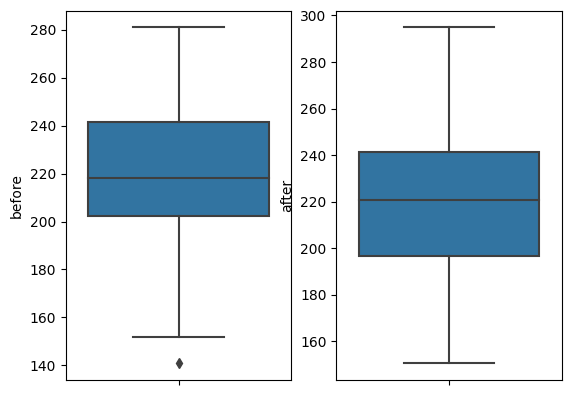

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

fig, ax = plt.subplots(nrows=1, ncols=2)
sns.boxplot(y=df['before'], ax=ax[0]);
sns.boxplot(y=df['after'], ax=ax[1]);

In [60]:
before = df['before']
after = df['after']

print(stats.shapiro(before))
print(stats.shapiro(after))
# 정규성 가짐

ShapiroResult(statistic=0.9920635223388672, pvalue=0.7270597219467163)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229286432266235)


In [61]:
stats.levene(before, after)
# 등분산

LeveneResult(statistic=1.3463330638203617, pvalue=0.24708279045237214)

In [62]:
stats.ttest_rel(before, after)
# 평균은 같다

Ttest_relResult(statistic=0.188900575991026, pvalue=0.8504925317234707)

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')
df.head()

,before,after
0,153,162
1,153,163
2,158,159
3,157,158
4,167,160


In [69]:
before = df['before']
after = df['after']

print(stats.shapiro(before))
print(stats.shapiro(after))
# 정규성 안 가짐

ShapiroResult(statistic=0.9173726439476013, pvalue=0.001897332607768476)
ShapiroResult(statistic=0.9448971152305603, pvalue=0.021141061559319496)


In [71]:
stats.levene(before, after)
# 등분산 : 대응표본의 경우 등분산성이 파라미터에 영향주지 않음

LeveneResult(statistic=0.14329522146179022, pvalue=0.7058456563194881)

In [72]:
stats.wilcoxon(before, after)
# 정규성이 없으므로 대응표본 검정 중 비모수 검정인 윌콕슨 부호순위 검정
# 기각 불가능

WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')
df.head()

,rpm,group
0,474.551593,a
1,450.548420,a
2,563.720934,a
3,506.886966,a
4,471.724049,a


In [75]:
a = df.loc[df['group']=='a']['rpm']
b = df.loc[df['group']=='b']['rpm']

print(stats.shapiro(a))
print(stats.shapiro(b))
# 둘다 정규성

ShapiroResult(statistic=0.9907213449478149, pvalue=0.8884111046791077)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)


In [76]:
stats.levene(a,b)
# 둘다 등 분산성

LeveneResult(statistic=0.06716114122680159, pvalue=0.7959020864923277)

In [82]:
stats.ttest_rel(a,b, alternative="less")
# 귀무가설 : a<=b, 기각 불가

Ttest_relResult(statistic=-1.9018108294460812, pvalue=0.030685663464464715)

## 카이제곱 검정 (교차분석)
- 일원 카이제곱 검정 (chisquare, 카이제곱 적합도 검정)
: 한 개의 요인에 의해 k개의 범주를 가질 때 이론적 분포를 따르는지 검정

- 이원 카이제곱 검정 (chi2_contingency, fisher_exact(빈도수 5개 이하 셀이 20% 이상일 때), 카이제곱 독립검정)
: 모집단이 두 개의 변수에 의해 범주화 되었을 때, 두 변수들의 사이 관계가 독립인지 아닌지 검정

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')
df.head()

,dice_number,counts
0,1,24
1,2,20
2,3,28
3,4,22
4,5,28


In [86]:
# 각 눈금의 발생 확률은 동일. 기댓값은 모든 값 / 경우
df['expected'] = (df['counts'].sum()/6)
stats.chisquare(df['counts'], df['expected'])
# 발생비율 동일

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [117]:
df = pd.DataFrame(df['hands'].value_counts())
df['expected'] = [int(df['hands'].sum()*0.8), int(df['hands'].sum()*0.2) ]
df.head()

,hands,expected
right,420,400
left,80,100


In [120]:
stats.chisquare(df['hands'], df['expected'])
# 기대 비율 0.8, 0.2가 아님

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)

In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [122]:
df = pd.crosstab(df['측정회원성별'], df['등급'])
df.head()

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


In [125]:
chi2, p, dof, expected = stats.chi2_contingency(df)
p
# 등급과 성별은 연관이 없다는 귀무가설을 기각하고, 
# 성별과 등급 간에는 관련이 있다는 대립가설 채택

7.481892813401677e-26

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df.head()

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [130]:
df = df.iloc[:-1, :-1]

print(stats.chi2_contingency(df))
# 성별과 참석 간에는 관련이 없다 => 독립

# 하지만 5보다 작은 셀이 20%가 넘어가므로 피셔 검정 사용 필요
print(stats.fisher_exact(df))
# 0.03 : 성별과 참석 여부는 관련이 있다 => 독립이 아니다

(3.277575757575758, 0.07023259819117404, 1, array([[1.875, 4.125],
       [3.125, 6.875]]))
(18.0, 0.035714285714285726)
